<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/1%EC%A3%BC%EC%B0%A8/3%EC%9D%BC_Knn_06_bin_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN 이진분류
-iris 데이터를 이용해서 이진분류

## 데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

--2024-06-26 06:34:57--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv.4’

iris.csv.4          100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-06-26 06:34:57 (54.5 MB/s) - ‘iris.csv.4’ saved [3858/3858]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
SEED=42

In [ ]:
df = pd.read_csv('iris.csv')
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [ ]:
df.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 범주형 변수

In [ ]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: xlabel='Species'>

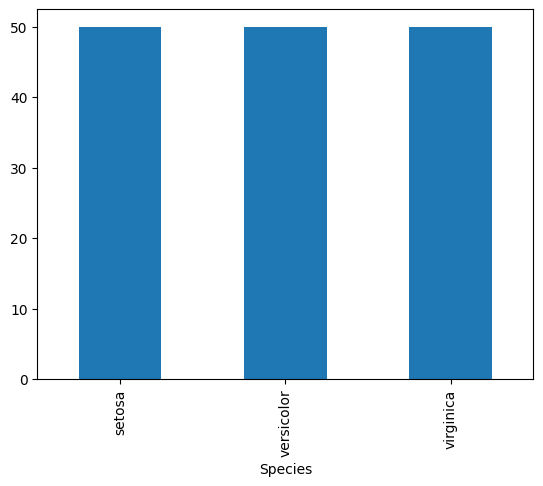

In [ ]:
df['Species'].value_counts().plot(kind='bar')

## 수치형(연속형)변수

(array([ 4.,  1.,  6., 10.,  5.,  8.,  5.,  3.,  5.,  3.]),
 array([4.9 , 5.11, 5.32, 5.53, 5.74, 5.95, 6.16, 6.37, 6.58, 6.79, 7.  ]),
 <BarContainer object of 10 artists>)

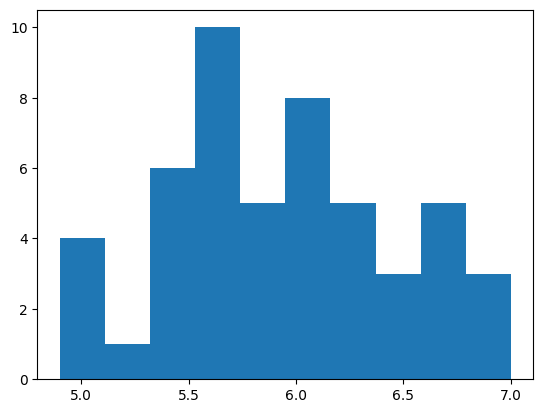

In [ ]:
df_versicolor = df[df['Species']=='versicolor']
plt.hist(df_versicolor['Sepal Length'])

## 데이터 섞기

In [ ]:
df= df.sample(frac=1,random_state=SEED)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,versicolor
106,4.9,2.5,4.5,1.7,virginica
14,5.8,4.0,1.2,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor


In [ ]:
idx_train=int(len(df)*0.7)

In [ ]:
df_train=df.iloc[:idx_train,:]
df_test=df.iloc[idx_train:,:]
df_train.shape, df_test.shape

((105, 5), (45, 5))

In [ ]:
X_train = df_train.drop('Species',axis=1)
y_train = df_train['Species']

In [ ]:
X_train.shape,y_train.shape

((105, 4), (105,))

In [ ]:
mu=X_train.mean()
sigma=X_train.std()

mu, sigma

(Sepal Length    5.776190
 Sepal Width     3.075238
 Petal Length    3.601905
 Petal Width     1.133333
 dtype: float64,
 Sepal Length    0.838328
 Sepal Width     0.460305
 Petal Length    1.813888
 Petal Width     0.777158
 dtype: float64)

In [ ]:
X_train_scaled=(X_train-mu)/sigma
X_train_scaled.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
73,0.386257,-0.597947,0.605382,0.085783
18,-0.090884,1.574524,-1.048524,-1.072283
118,2.294819,-1.032441,1.818247,1.501196
78,0.266971,-0.380700,0.495122,0.471805
76,1.221252,-0.597947,0.660512,0.343131


In [ ]:
ss_dic={'mean':mu,'std':sigma} # mu와 sigma 저장
ss_dic

{'mean': Sepal Length    5.776190
 Sepal Width     3.075238
 Petal Length    3.601905
 Petal Width     1.133333
 dtype: float64,
 'std': Sepal Length    0.838328
 Sepal Width     0.460305
 Petal Length    1.813888
 Petal Width     0.777158
 dtype: float64}

In [ ]:
label_dict={'versicolor':0, 'setosa':1, 'virginica':2} #  전처리에 사용된 데이터 들은 따로 저장

In [ ]:
y_train_e=y_train.map(label_dict)
y_train_e

73     0
18     1
118    2
78     0
76     0
      ..
3      1
17     1
38     1
72     0
136    2
Name: Species, Length: 105, dtype: int64

In [ ]:
type(X_train_scaled),type(y_train_e)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X_train_scaled = X_train_scaled.to_numpy()
y_train_e= y_train_e.to_numpy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf
clf.fit(X_train_scaled,y_train_e)

KNeighborsClassifier(n_neighbors=3)

## 테스트

In [ ]:
X_test = df_test.drop('Species',axis=1)
y_test = df_test['Species']

In [ ]:
X_test.shape, y_test.shape
X_test_scaled=(X_test-mu)/sigma
y_test_e=y_test.map(label_dict)

In [ ]:
X_test_scaled.shape, y_test.shape

((45, 4), (45,))

In [ ]:
X_test_scaled=X_test_scaled.to_numpy()
y_test_e=y_test_e.to_numpy()

In [ ]:
type(X_test_scaled), type(y_test_e)

(numpy.ndarray, numpy.ndarray)

In [ ]:
y_pred=clf.predict(X_test_scaled)
y_pred

array([1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2,
       2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0,
       2])

In [ ]:
(y_pred == y_test_e).sum()/len(y_test_e)

0.9555555555555556

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('accuracy',accuracy_score(y_test_e,y_pred))
print('recall',recall_score(y_test_e,y_pred,average='macro'))
print('precision',precision_score(y_test_e,y_pred,average='macro'))
print('f1_score',f1_score(y_test_e,y_pred, average='macro'))

accuracy 0.9555555555555556
recall 0.9629629629629629
precision 0.9649122807017544
f1_score 0.9618736383442266


In [ ]:
'from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test_e,y_pred)

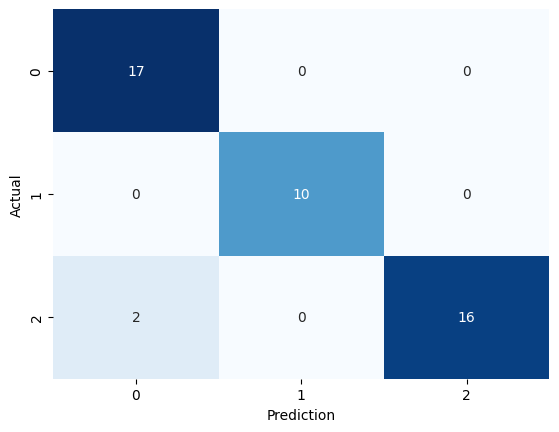

In [ ]:
s=sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
s.set(xlabel='Prediction',ylabel='Actual')
plt.show()